## < Classification Modeling and Evaluation >  
* #### Group 6 ####  
* #### Memebers: Eunji Hwang(22100809) , Jaehee Kim (22100173) , Chan Yang (22000415) , Yisak Jeong (22000689)


### 1. Implement a data pre-processing module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

train = pd.read_csv("Classification_training_data.csv")
test = pd.read_csv("Classification_testing_data.csv")

In [2]:
train.isnull().sum().sum() # checing missing value of train dataset

0

In [3]:
test.isnull().sum().sum() # check the missing value of test dataset 

0

In [4]:
train_no=train.iloc[:,4:]#remove Columns Unnamed:0, site, sid, date
test_no=test.iloc[:,4:]

In [5]:
# categorical value 'leaktype' encoding
le=LabelEncoder()
train_no['leaktype']=le.fit_transform(train_no['leaktype'])
test_no['leaktype']=le.fit_transform(test_no['leaktype'])

In [6]:
# feature scaling
scaler = StandardScaler()
X_train_no = scaler.fit_transform(train_no.drop('leaktype',axis=1))
y_train_no = train_no['leaktype']
X_test_no = scaler.fit_transform(test_no.drop('leaktype',axis=1))
y_test_no = test_no['leaktype']

## 2. Select a classification algorithm   
#### * Compare K-NN, SVM, and Decision Tree


#### 2-(1) Implement KNN

In [7]:
#knn=KNeighborsClassifier(n_neighbors=5)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_no,y_train_no)
predicts_KNN=knn.predict(X_test_no)

In [8]:
# confusion matrix function
def compute_confusion_matrix(y_true, y_pred, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true][pred] += 1
    return confusion_matrix

#  calculate precision and recall function 
def calculate_precision_recall(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)

    for i in range(num_classes):
        tp = confusion_matrix[i, i]
        fp = confusion_matrix[:, i].sum() - tp
        fn = confusion_matrix[i, :].sum() - tp

        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (fn + tp) if (fn + tp) > 0 else 0

    return precision, recall

# Calculate confusion matrix,accuracy, precision, recall
num_classes = len(le.classes_)
conf_matrix_KNN = compute_confusion_matrix(y_test_no, predicts_KNN, num_classes)
precision_KNN, recall_KNN = calculate_precision_recall(conf_matrix_KNN)
accuracy_KNN = np.trace(conf_matrix_KNN) / np.sum(conf_matrix_KNN)

# print confusion matrix, accuracy, precision, recall
print("Confusion Matrix:")
print(conf_matrix_KNN)

print(f"\nAccuracy: {accuracy_KNN}")

for i, class_label in enumerate(le.classes_):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_KNN[i]:.2f}")
    print(f"  Recall: {recall_KNN[i]:.2f}")

Confusion Matrix:
[[852  48   0  50  50]
 [ 35 872   0  46  47]
 [ 10  10 963  10   7]
 [ 49  66   5 836  44]
 [ 81  46   7  51 815]]

Accuracy: 0.8676
Class in:
  Precision: 0.83
  Recall: 0.85
Class noise:
  Precision: 0.84
  Recall: 0.87
Class normal:
  Precision: 0.99
  Recall: 0.96
Class other:
  Precision: 0.84
  Recall: 0.84
Class out:
  Precision: 0.85
  Recall: 0.81


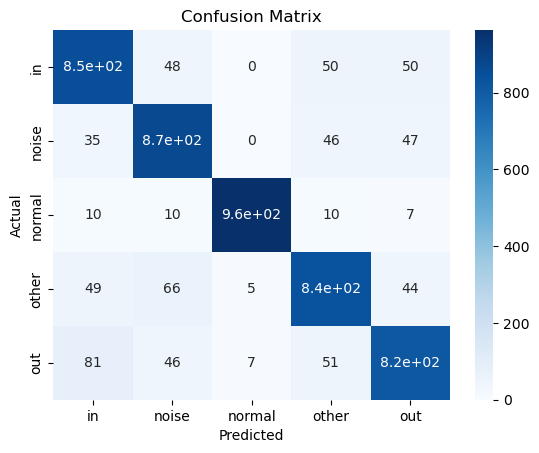

In [9]:
# visualization of confusion matrix
sns.heatmap(conf_matrix_KNN,annot=True,cmap='Blues',xticklabels=['in','noise','normal','other','out'],yticklabels=['in','noise','normal','other','out'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 2-(2) Implement DT algorithm

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_no, y_train_no)
y_pred_DT=model.predict(X_test_no)

In [11]:
#  Calculate confusion matrix, accuracy, precision, recall
num_classes = len(le.classes_)
conf_matrix_DT = compute_confusion_matrix(y_test_no, y_pred_DT, num_classes)
precision_DT, recall_DT = calculate_precision_recall(conf_matrix_DT)
accuracy_DT = np.trace(conf_matrix_DT) / np.sum(conf_matrix_DT)

# print confusion matrix, accuracy, precision, recall
print("Confusion Matrix:")
print(conf_matrix_DT)

print(f"\nAccuracy: {accuracy_DT}")

for i, class_label in enumerate(le.classes_):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_DT[i]:.2f}")
    print(f"  Recall: {recall_DT[i]:.2f}")

Confusion Matrix:
[[ 611   89    0  120  180]
 [ 138  612    0  143  107]
 [   0    0 1000    0    0]
 [ 126   77    0  630  167]
 [ 163   80    0   95  662]]

Accuracy: 0.703
Class in:
  Precision: 0.59
  Recall: 0.61
Class noise:
  Precision: 0.71
  Recall: 0.61
Class normal:
  Precision: 1.00
  Recall: 1.00
Class other:
  Precision: 0.64
  Recall: 0.63
Class out:
  Precision: 0.59
  Recall: 0.66


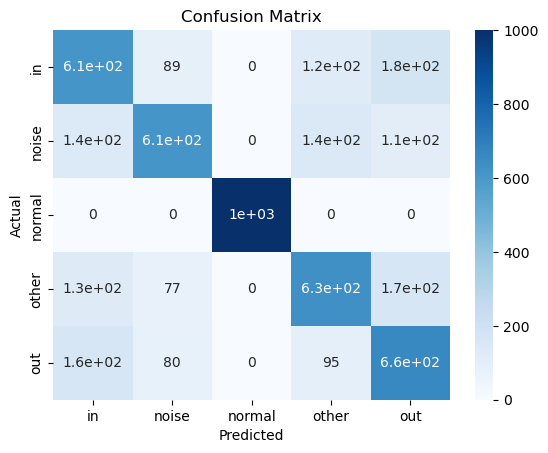

In [12]:
#visualization of confusion matrix
sns.heatmap(conf_matrix_DT,annot=True,cmap='Blues',xticklabels=['in','noise','normal','other','out'],yticklabels=['in','noise','normal','other','out'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 2-(3) Implement SVM algorithm

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import numpy as np

# 모델 학습
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train_no,y_train_no)
y_pred = svm_classifier.predict(X_test_no)



In [15]:
# 혼동 행렬 수동 계산
def compute_confusion_matrix(y_true, y_pred, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true][pred] += 1
    return confusion_matrix

# 정밀도, 재현율 계산
def calculate_precision_recall(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    
    for i in range(num_classes):
        tp = confusion_matrix[i, i]
        fp = confusion_matrix[:, i].sum() - tp
        fn = confusion_matrix[i, :].sum() - tp
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (fn + tp) if (fn + tp) > 0 else 0
    
    return precision, recall

# 혼동 행렬 및 평가 지표 계산
num_classes = len(le.classes_)
conf_matrix = compute_confusion_matrix(y_test_no, y_pred, num_classes)
precision, recall = calculate_precision_recall(conf_matrix)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)

print(f"\nAccuracy: {accuracy:.2f}")

for i, class_label in enumerate(le.classes_):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")


Confusion Matrix:
[[606 172   0 105 117]
 [ 68 823   0  56  53]
 [  2   1 996   0   1]
 [ 61 207   0 634  98]
 [107 131   0 159 603]]

Accuracy: 0.73
Class in:
  Precision: 0.72
  Recall: 0.61
Class noise:
  Precision: 0.62
  Recall: 0.82
Class normal:
  Precision: 1.00
  Recall: 1.00
Class other:
  Precision: 0.66
  Recall: 0.63
Class out:
  Precision: 0.69
  Recall: 0.60


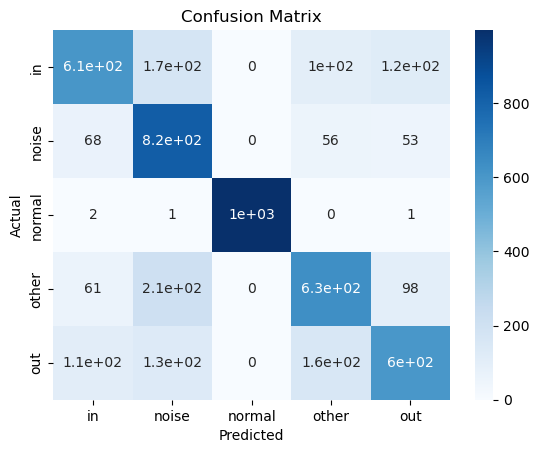

In [16]:
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=['in','noise','normal','other','out'],yticklabels=['in','noise','normal','other','out'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### 2- (1) Understanding the Relationship between K-NN and Outliers
 * By handling the Outliers with MAX variables and then Implement KNN to check the accuracy 

Existing MAX Columns: ['MAX0', 'MAX1', 'MAX2', 'MAX3', 'MAX4', 'MAX5', 'MAX6', 'MAX7', 'MAX8', 'MAX9', 'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17', 'MAX18', 'MAX19']


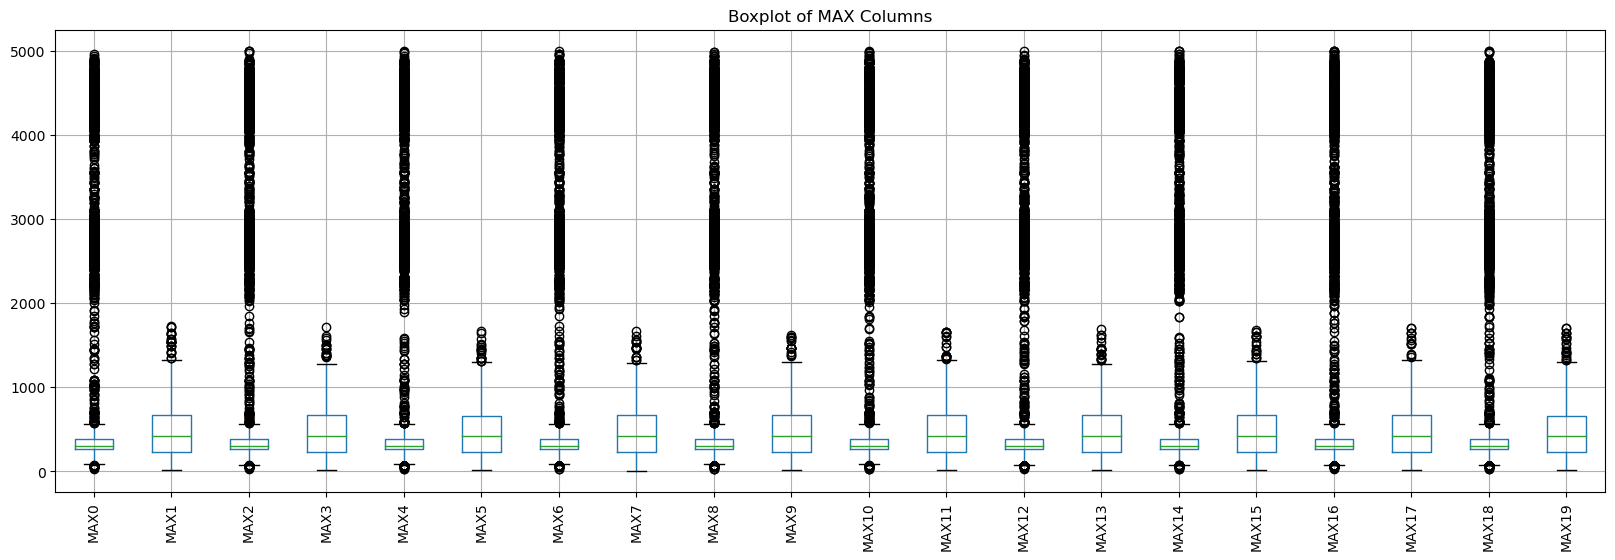

Data frame size after outlier removal: (22177, 540)


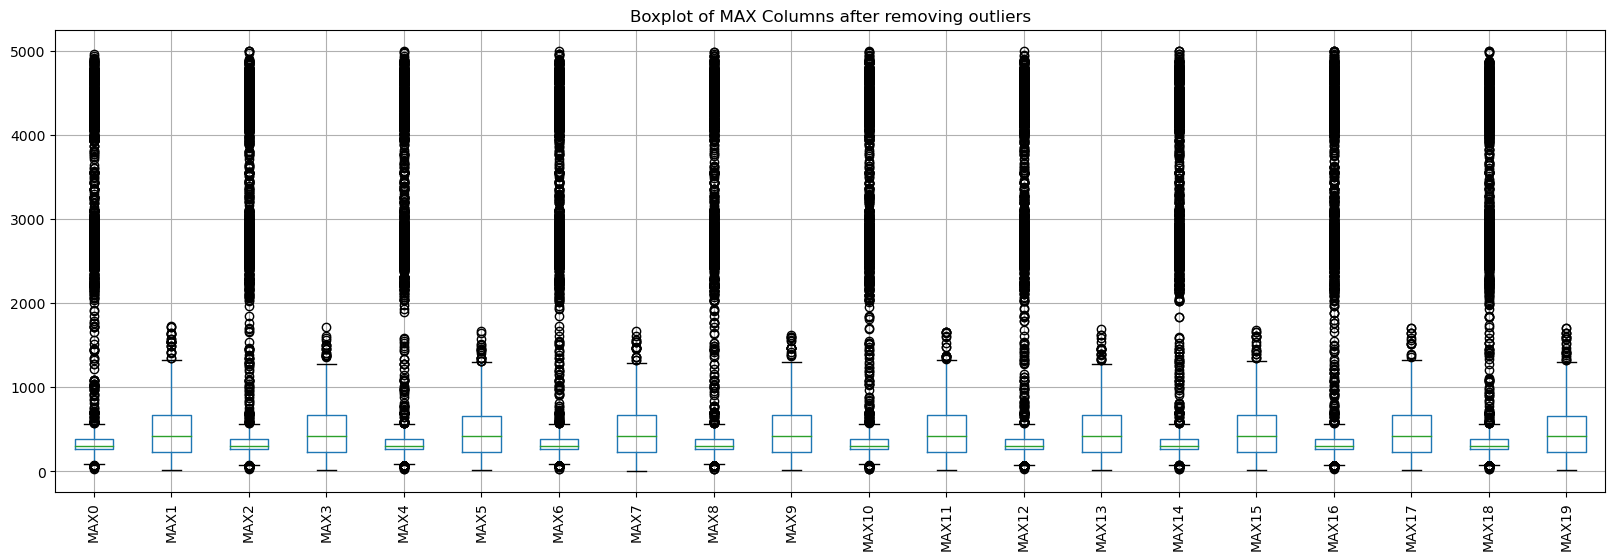

   Unnamed: 0          site                 sid     ldate  lrate  llevel  \
0           0  S-4372025021  S-0359369085176630  20210121     90     273   
1           2  S-4784025026  S-0359369085156350  20210115     90     940   
2           3  S-4372025021  S-0359369085156145  20210101     90     751   
3           4  S-4721011100  S-0359369084144779  20200426     90     374   
4           5  S-4885025022  S-0359369085113740  20201222     90     442   

  leaktype  0HZ  10HZ  20HZ  ...  MAX10  MAX11  MAX12  MAX13  MAX14  MAX15  \
0       in    0     4     3  ...    330    358    320    252    320    164   
1       in    0     0     0  ...    260    992    260   1083    260   1013   
2       in    0     0     0  ...    250    968    250    678    250    660   
3       in    0     4     4  ...    420    389    420    471    410    274   
4       in    0    17    15  ...    340    427    320    469    330    495   

   MAX16  MAX17  MAX18  MAX19  
0    330    381    330    249  
1    260  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# 'MAX'로 시작하는 열 확인 및 선택
max_columns = [col for col in train.columns if col.startswith('MAX')]

# 실제 존재하는 MAX 컬럼 확인
print("Existing MAX Columns:", max_columns)

# 이상치 확인 함수
def detect_outliers(df, columns):
    outlier_indices = []
    
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# 데이터 분포 시각화
plt.figure(figsize=(20, 6))
train[max_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of MAX Columns")
plt.show()

# MAX 컬럼에 대해 이상치 확인
outliers = detect_outliers(train, max_columns)
#print(f"MAX 컬럼 범위의 이상치 인덱스: {outliers}")

# 이상치 제거
train_out = train.drop(outliers).reset_index(drop=True)
print(f"Data frame size after outlier removal: {train_out.shape}")

# 이상치 제거 후 MAX 컬럼 데이터 분포 시각화
plt.figure(figsize=(20, 6))
train[max_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of MAX Columns after removing outliers")
plt.show()

# 데이터프레임 출력
print(train_out.head())  # 데이터프레임의 첫 5행을 출력합니다.


Existing MAX Columns: ['MAX0', 'MAX1', 'MAX2', 'MAX3', 'MAX4', 'MAX5', 'MAX6', 'MAX7', 'MAX8', 'MAX9', 'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17', 'MAX18', 'MAX19']


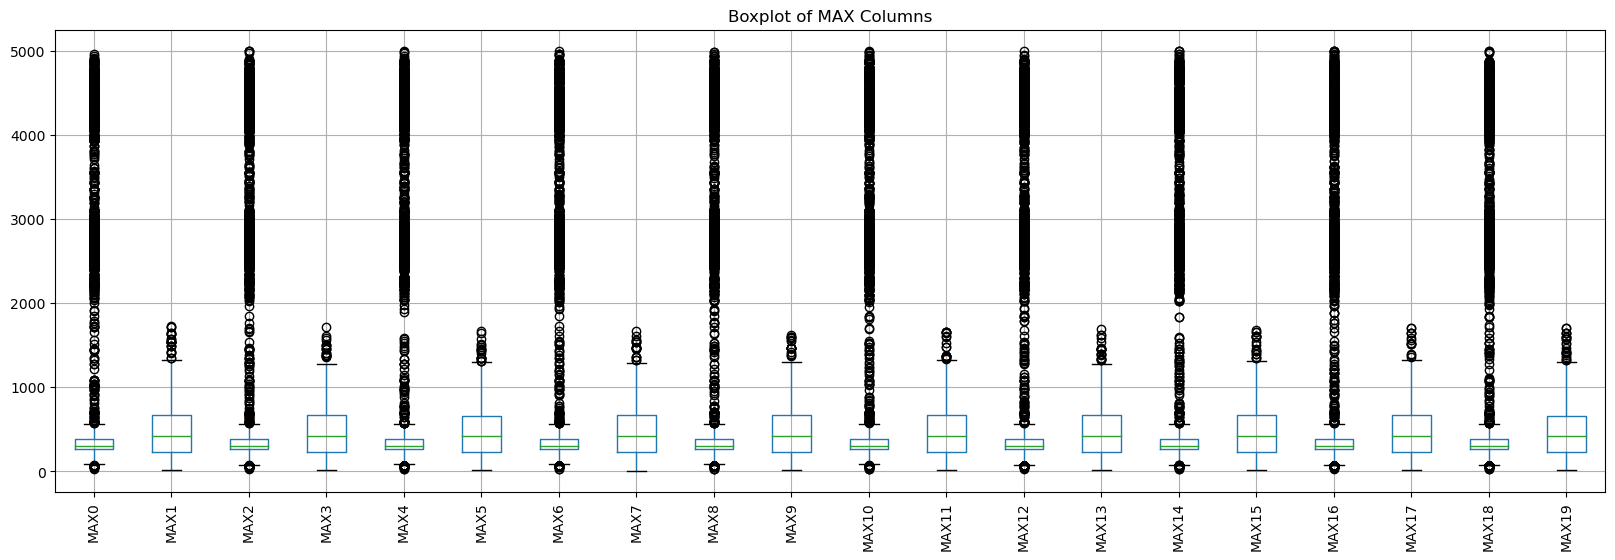

Data frame size after outlier removal: (4456, 540)


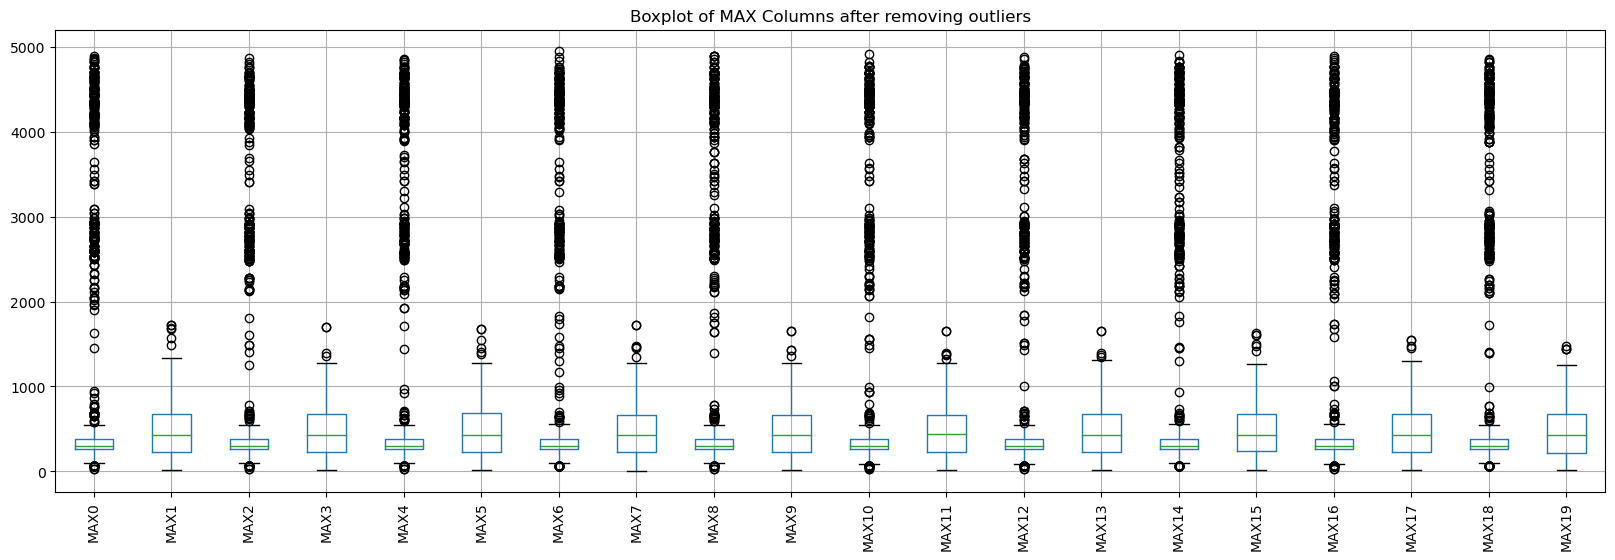

   Unnamed: 0          site                 sid     ldate  lrate  llevel  \
0           0  S-4372025021  S-0359369085194641  20200823     90     605   
1           1  S-4677025029  S-0359369081459428  20190702     90     554   
2           2  S-4376025033  S-0035514005600354  20200514     90     611   
3           3  S-4793025022  S-0359369085859748  20210112     90     704   
4           4  S-4677025028  S-0359369084269238  20190820     90     512   

  leaktype  0HZ  10HZ  20HZ  ...  MAX10  MAX11  MAX12  MAX13  MAX14  MAX15  \
0       in    0    12    12  ...    420    680    420    590    420    714   
1       in    0     4     4  ...    360    883    360    432    360    416   
2       in    0     2     2  ...    420    459    430    485    420    571   
3       in    0     3     3  ...    250    762    250    586    250    705   
4       in    0     2     2  ...    350    381    360    579    350    593   

   MAX16  MAX17  MAX18  MAX19  
0    420    526    420    715  
1    360  

In [18]:
## test data ## 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


max_columns = [col for col in test.columns if col.startswith('MAX')]

# 실제 존재하는 MAX 컬럼 확인
print("Existing MAX Columns:", max_columns)

# 이상치 확인 함수
def detect_outliers(df, columns):
    outlier_indices = []
    
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# 데이터 분포 시각화
plt.figure(figsize=(20, 6))
train[max_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of MAX Columns")
plt.show()

# MAX 컬럼에 대해 이상치 확인 및 제거
outliers = detect_outliers(test, max_columns)
#print(f"MAX 컬럼 범위의 이상치 인덱스: {outliers}")

# 이상치 제거
test_out = test.drop(outliers).reset_index(drop=True)
print(f"Data frame size after outlier removal: {test_out.shape}")

# 이상치 제거 후 MAX 컬럼 데이터 분포 시각화
plt.figure(figsize=(20, 6))
test[max_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of MAX Columns after removing outliers")
plt.show()

# 데이터프레임 출력
print(test_out.head())  # 데이터프레임의 첫 5행을 출력합니다.


In [19]:
train_no=train_out.iloc[:,4:]#remove Columns Unnamed:0, site, sid, date
test_no=test_out.iloc[:,4:]

# categorical value 'leaktype' encoding
le=LabelEncoder()
train_no['leaktype']=le.fit_transform(train_no['leaktype'])
test_no['leaktype']=le.fit_transform(test_no['leaktype'])

# feature scaling
scaler = StandardScaler()
X_train_no = scaler.fit_transform(train_no.drop('leaktype',axis=1))
y_train_no = train_no['leaktype']
X_test_no = scaler.fit_transform(test_no.drop('leaktype',axis=1))
y_test_no = test_no['leaktype']

In [20]:
## 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_no,y_train_no)
predicts_KNN=knn.predict(X_test_no)

In [21]:
# confusion matrix function
def compute_confusion_matrix(y_true, y_pred, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true][pred] += 1
    return confusion_matrix

#  calculate precision and recall function 
def calculate_precision_recall(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)

    for i in range(num_classes):
        tp = confusion_matrix[i, i]
        fp = confusion_matrix[:, i].sum() - tp
        fn = confusion_matrix[i, :].sum() - tp

        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (fn + tp) if (fn + tp) > 0 else 0

    return precision, recall

# Calculate confusion matrix,accuracy, precision, recall
num_classes = len(le.classes_)
conf_matrix_KNN = compute_confusion_matrix(y_test_no, predicts_KNN, num_classes)
precision_KNN, recall_KNN = calculate_precision_recall(conf_matrix_KNN)
accuracy_KNN = np.trace(conf_matrix_KNN) / np.sum(conf_matrix_KNN)

# print confusion matrix, accuracy, precision, recall
print("Confusion Matrix:")
print(conf_matrix_KNN)

print(f"\nAccuracy: {accuracy_KNN}")

for i, class_label in enumerate(le.classes_):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_KNN[i]:.2f}")
    print(f"  Recall: {recall_KNN[i]:.2f}")

Confusion Matrix:
[[702  68   1  66  72]
 [ 56 769   2  73  39]
 [  7  14 790   7   5]
 [ 69  68   3 706  45]
 [ 73  50  10  74 687]]

Accuracy: 0.8200179533213644
Class in:
  Precision: 0.77
  Recall: 0.77
Class noise:
  Precision: 0.79
  Recall: 0.82
Class normal:
  Precision: 0.98
  Recall: 0.96
Class other:
  Precision: 0.76
  Recall: 0.79
Class out:
  Precision: 0.81
  Recall: 0.77


### 3. The strategy to customize features from the dataset, which potentially impacts the model’s accuracy and the interpretability of the results.

#### 3- (1) Adding seanson colunm

In [22]:
# 날짜 데이터 처리
train['ldate'] = pd.to_datetime(train['ldate'], format='%Y%m%d')
test['ldate'] = pd.to_datetime(test['ldate'], format='%Y%m%d')

# 날짜에서 연, 월, 일 추출
train['year'] = train['ldate'].dt.year
train['month'] = train['ldate'].dt.month
train['day'] = train['ldate'].dt.day
test['year'] = test['ldate'].dt.year
test['month'] = test['ldate'].dt.month
test['day'] = test['ldate'].dt.day

# 원래 'ldate' 열 제거
train.drop('ldate', axis=1, inplace=True)
test.drop('ldate', axis=1, inplace=True)

# 계절로 범주화
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# 'season' 열을 생성하여 월 데이터를 계절로 매핑
train['season'] = train['month'].apply(get_season)
test['season'] = test['month'].apply(get_season)

In [23]:
train

,Unnamed: 0,site,sid,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19,year,month,day,season
0,0,S-4372025021,S-0359369085176630,90,273,in,0,4,3,4,...,320,164,330,381,330,249,2021,1,21,Winter
1,1,S-4372025021,S-0359369085132252,90,219,in,0,4,4,4,...,2540,254,2550,261,260,218,2021,2,9,Winter
2,2,S-4784025026,S-0359369085156350,90,940,in,0,0,0,0,...,260,1013,260,1086,270,767,2021,1,15,Winter
3,3,S-4372025021,S-0359369085156145,90,751,in,0,0,0,0,...,250,660,250,828,250,931,2021,1,1,Winter
4,4,S-4721011100,S-0359369084144779,90,374,in,0,4,4,4,...,410,274,410,290,420,385,2020,4,26,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,S-4280025040,S-0359369085238554,90,991,out,0,4,4,4,...,290,779,290,926,290,1085,2021,2,8,Winter
24996,24996,S-2911010106,S-0359369084034277,90,184,out,0,8,9,8,...,290,220,290,190,290,163,2021,2,6,Winter
24997,24997,S-4372025021,S-0359369085138440,90,845,out,0,3,3,3,...,250,759,250,831,250,700,2020,11,12,Autumn
24998,24998,S-4772025022,S-0359369084107842,90,716,out,0,3,6,3,...,360,857,360,863,360,590,2020,5,23,Spring


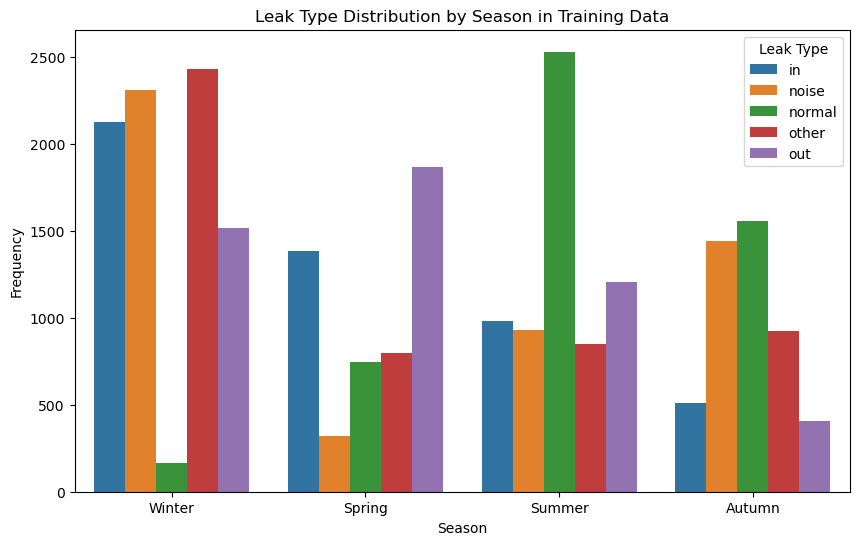

In [24]:
#  Visualize the distribution of leaktype using train data
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='leaktype', data=train)
plt.title('Leak Type Distribution by Season in Training Data')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(title='Leak Type')
plt.show()

In [25]:
train_season=train.iloc[:,3:] #remove Columns Unnamed:0, site, sid
test_season=test.iloc[:,3:]

In [26]:
# Encoding the categorical value season and leaktype
le=LabelEncoder()
train_season['season']=le.fit_transform(train_season['season'])
train_season['leaktype']=le.fit_transform(train_season['leaktype'])
test_season['season']=le.fit_transform(test_season['season'])
test_season['leaktype']=le.fit_transform(test_season['leaktype'])

In [27]:
# feature scaling
scaler = StandardScaler()
X_train_season = scaler.fit_transform(train_season.drop('leaktype',axis=1))
y_train_season = train_season['leaktype']
X_test_season = scaler.fit_transform(test_season.drop('leaktype',axis=1))
y_test_season = test_season['leaktype']

#### Using K-NN algorithm with season column

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_season,y_train_season)
predicts_KNNs=knn.predict(X_test_season)

In [29]:
# Calculate confusion matrix, accuracy, precision, recall
num_classes = len(le.classes_)
conf_matrix_KNNs = compute_confusion_matrix(y_test_season, predicts_KNNs, num_classes)
precision_KNNs, recall_KNNs = calculate_precision_recall(conf_matrix_KNNs)
accuracy_KNNs = np.trace(conf_matrix_KNNs) / np.sum(conf_matrix_KNNs)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix_KNNs)

print(f"\nAccuracy: {accuracy_KNNs}")

for i, class_label in enumerate(le.classes_):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_KNNs[i]:.2f}")
    print(f"  Recall: {recall_KNNs[i]:.2f}")

Confusion Matrix:
[[861  44   0  42  53]
 [ 33 889   1  38  39]
 [  3  10 974   9   4]
 [ 51  41   5 865  38]
 [ 67  28   6  53 846]]

Accuracy: 0.887
Class in:
  Precision: 0.85
  Recall: 0.86
Class noise:
  Precision: 0.88
  Recall: 0.89
Class normal:
  Precision: 0.99
  Recall: 0.97
Class other:
  Precision: 0.86
  Recall: 0.86
Class out:
  Precision: 0.86
  Recall: 0.85


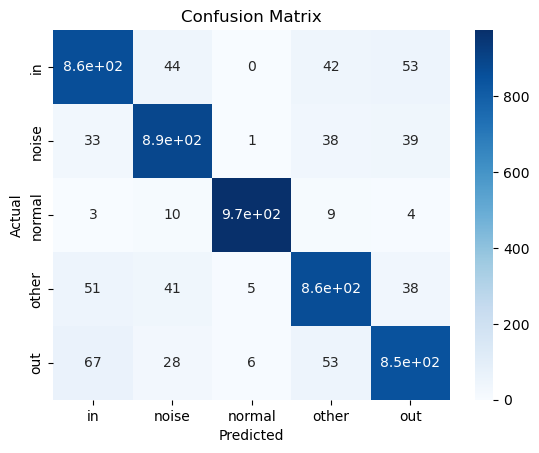

In [30]:
# visualization of confusion matrix
sns.heatmap(conf_matrix_KNNs,annot=True,cmap='Blues',xticklabels=['in','noise','normal','other','out'],yticklabels=['in','noise','normal','other','out'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 4. Identify areas for improvement in the classification model and approach to customizing features.

#### 4-(1) Divide the frequency band into a certain range and use the average value as a characteristic (in units of 100)

In [31]:
import pandas as pd

train = pd.read_csv("Classification_training_data.csv")
test = pd.read_csv("Classification_testing_data.csv")

In [32]:
# Define the frequency bands
frequency_bands = [(i, i+99) for i in range(0, 5120, 100)]

# Function to calculate mean frequency response for each band
def calculate_mean_response(df, bands):
    mean_responses = pd.DataFrame()
    for start, end in bands:
        # Column names in the range
        cols = [f"{freq}HZ" for freq in range(start, end+1) if f"{freq}HZ" in df.columns]
        if cols:
            # Mean response for the band
            mean_responses[f"{start}-{end}HZ_mean"] = df[cols].mean(axis=1)
    return pd.concat([df[['site', 'sid', 'ldate', 'lrate', 'llevel', 'leaktype']], mean_responses], axis=1)

# Calculate mean frequency responses for both datasets
train = calculate_mean_response(train, frequency_bands)
test = calculate_mean_response(test, frequency_bands)

train.head(), test.head()

(           site                 sid     ldate  lrate  llevel leaktype  \
 0  S-4372025021  S-0359369085176630  20210121     90     273       in   
 1  S-4372025021  S-0359369085132252  20210209     90     219       in   
 2  S-4784025026  S-0359369085156350  20210115     90     940       in   
 3  S-4372025021  S-0359369085156145  20210101     90     751       in   
 4  S-4721011100  S-0359369084144779  20200426     90     374       in   
 
    0-99HZ_mean  100-199HZ_mean  200-299HZ_mean  300-399HZ_mean  ...  \
 0         11.2             7.5            24.1            90.5  ...   
 1          4.2            10.5            67.0            18.1  ...   
 2          0.0            14.6           212.5            23.6  ...   
 3          1.2             7.8           184.7            14.4  ...   
 4          4.9             5.1            19.6            73.8  ...   
 
    4200-4299HZ_mean  4300-4399HZ_mean  4400-4499HZ_mean  4500-4599HZ_mean  \
 0               5.3               5.1    

#### Pre-Processing


In [33]:
# 불필요한 열 제거
columns_to_drop = ['site', 'sid']
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

In [34]:
# 날짜 데이터 처리
train['ldate'] = pd.to_datetime(train['ldate'], format='%Y%m%d')
test['ldate'] = pd.to_datetime(test['ldate'], format='%Y%m%d')

# 날짜에서 연, 월, 일 추출
train['year'] = train['ldate'].dt.year
train['month'] = train['ldate'].dt.month
train['day'] = train['ldate'].dt.day
test['year'] = test['ldate'].dt.year
test['month'] = test['ldate'].dt.month
test['day'] = test['ldate'].dt.day

# 원래 'ldate' 열 제거
train.drop('ldate', axis=1, inplace=True)
test.drop('ldate', axis=1, inplace=True)

In [35]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# 'season' 열을 생성하여 월 데이터를 계절로 매핑
train['season'] = train['month'].apply(get_season)
test['season'] = test['month'].apply(get_season)

In [36]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
train['leaktype'] = label_encoder.fit_transform(train['leaktype'])
test['leaktype'] = label_encoder.transform(test['leaktype'])
train['season'] = label_encoder.fit_transform(train['season'])
test['season'] = label_encoder.transform(test['season'])

In [37]:
# 수치 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop('leaktype', axis=1))
X_test_scaled = scaler.transform(test.drop('leaktype', axis=1))
y_train = train['leaktype']
y_test = test['leaktype']

#### Implement KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNeighborsClassifier: starting with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(class_report)
#class_report

Accuracy: 0.8326
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.78      0.87      0.82      1000
           2       1.00      0.99      1.00      1000
           3       0.79      0.79      0.79      1000
           4       0.83      0.76      0.79      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



#### 4-(2) Find out Best K 

#### - Grid Search

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': np.arange(1, 21),  # 1부터 20까지의 K 값
    'weights': ['uniform', 'distance'],  # 가중치 설정
    'metric': ['euclidean', 'manhattan']  # 거리 측정 방법
}

# GridSearchCV로 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 성능 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score: {:.2f}".format(best_score))

# 최적의 KNN 모델
knn_best = grid_search.best_estimator_

# 테스트 데이터셋에 대한 성능 평가
test_score = knn_best.score(X_test_scaled, y_test)
print("Test set score: {:.2f}".format(test_score))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.92
Test set score: 0.88


#### - Cross validation

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k to test
k_values = range(1, 21)

# Dictionary to store accuracy for each k
accuracy_scores = {}

for k in k_values:
    # Initialize the KNeighborsClassifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute cross-validation score using accuracy as the scoring method
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Average accuracy
    accuracy_scores[k] = np.mean(scores)

# Find the key with the highest value (best k)
best_k = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_k]

best_k, best_accuracy, accuracy_scores

(1,
 0.9103600000000001,
 {1: 0.9103600000000001,
  2: 0.87364,
  3: 0.86496,
  4: 0.84848,
  5: 0.83988,
  6: 0.8288399999999999,
  7: 0.8200000000000001,
  8: 0.8098399999999998,
  9: 0.80252,
  10: 0.7958399999999999,
  11: 0.7896000000000001,
  12: 0.78352,
  13: 0.77908,
  14: 0.7726,
  15: 0.7696399999999999,
  16: 0.76456,
  17: 0.76056,
  18: 0.7552000000000001,
  19: 0.75068,
  20: 0.74816})

## Reference    
* OpenAI. ChatGPT. https://openai.com/chatgpt  
* Lecture Notes on Module 6-5-1 Classification model evaluation  
* Jungyu Choi, Sungbin Im.(2023).Leak Detection and Classification of Water Pipeline based on SVM using Leakage Noise Magnitude Spectrum.Journal of the Institute of Electronics and Information Engineers,60(2),6-14.  
* Yu, T., Chen, X., Yan, W.J., Xu, Z., & Ye, M. Leak detection in water distribution systems by classifying vibration signals. Mechanical Systems and Signal Processing.